Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
dff = pd.read_csv("fcc-forum-pageviews.csv")
dff.head(10)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
5,2016-05-14,3127
6,2016-05-15,2927
7,2016-05-16,2591
8,2016-05-17,3403
9,2016-05-18,5410


In [3]:
dff.describe()
dff.info

<bound method DataFrame.info of             date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]>

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [62]:
df = dff.loc[(dff['value']>dff['value'].quantile(0.025)) & (dff['value']<dff['value'].quantile(0.975))]
df.reset_index()

,index,date,value
0,10,2016-05-19,19736
1,17,2016-05-26,18060
2,18,2016-05-27,19997
3,19,2016-05-28,19044
4,20,2016-05-29,20325
...,...,...,...
1233,1294,2019-11-24,138875
1234,1299,2019-11-29,171584
1235,1300,2019-11-30,141161
1236,1301,2019-12-01,142918


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views

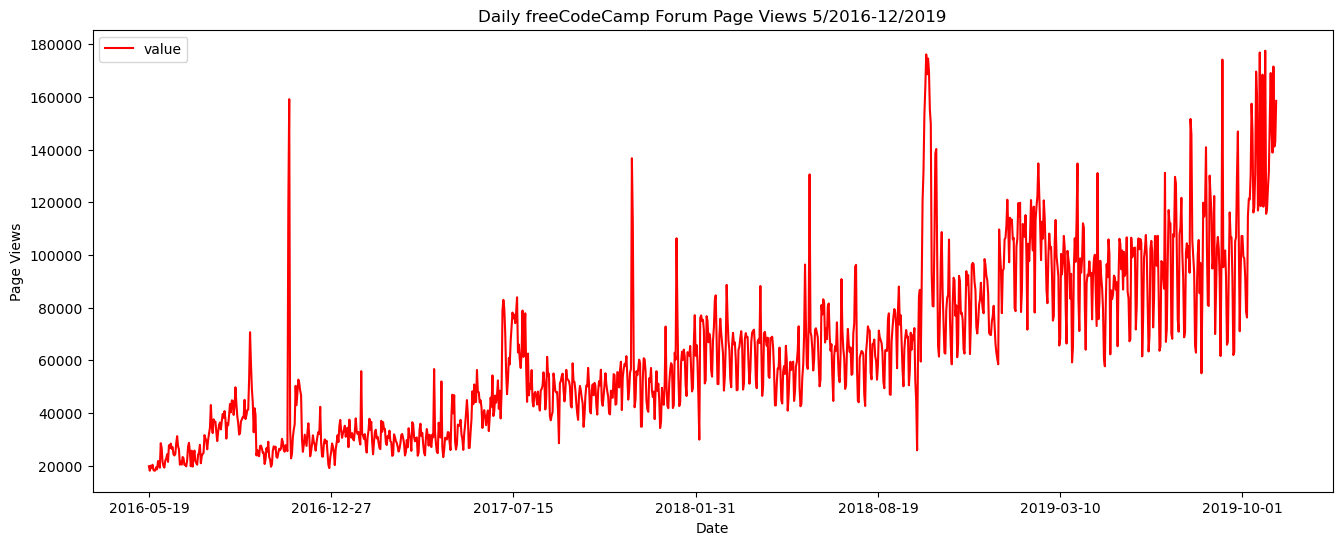

In [63]:
df.plot(kind='line', figsize=(16,6), color='red', x= 'date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

Create a draw_bar_plot function that draws a bar chart . It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [108]:
df_bar = df.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar['year']
df_bar['month'] =pd.DatetimeIndex(df_bar['date']).month_name()
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
df_bar
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

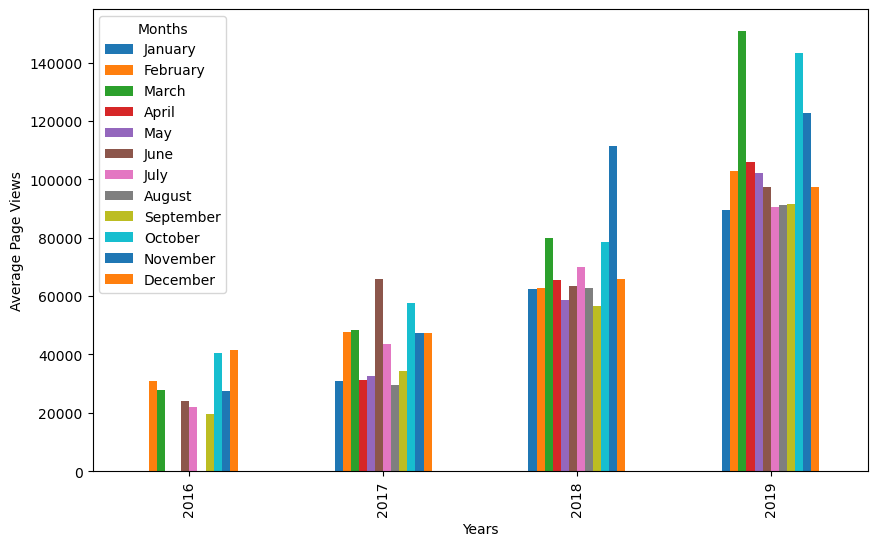

In [82]:
# Draw bar plot
df_bar.plot(kind='bar', figsize=(10,6), legend=True)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.show()

Create  two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data

In [86]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = pd.DatetimeIndex(df_box['date']).year
df_box['month'] = pd.DatetimeIndex(df_box['date']).month_name()
df_box

,index,date,value,year,month
0,10,2016-05-19,19736,2016,May
1,17,2016-05-26,18060,2016,May
2,18,2016-05-27,19997,2016,May
3,19,2016-05-28,19044,2016,May
4,20,2016-05-29,20325,2016,May
...,...,...,...,...,...
1233,1294,2019-11-24,138875,2019,November
1234,1299,2019-11-29,171584,2019,November
1235,1300,2019-11-30,141161,2019,November
1236,1301,2019-12-01,142918,2019,December


Text(0, 0.5, 'Page Views')

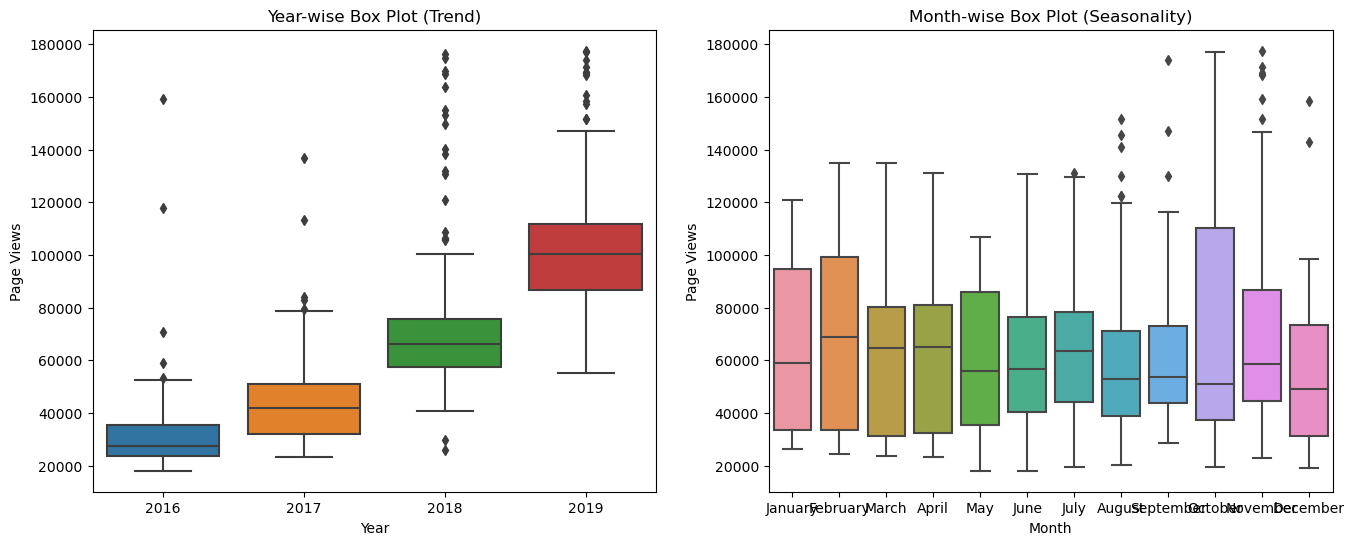

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_box['month'] = pd.Categorical(df_box['month'],categories=month_order,ordered=True)
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
